In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import torch
import json

# **Load and visualize the data**

In [0]:
# Pol
# Read Balanced train data set
pol_train_balanced = pd.read_csv("/content/gdrive/My Drive/HCLHackathon/Pol/pol_train-balanced.csv", delimiter='|')
pol_test_balanced = pd.read_csv("/content/gdrive/My Drive/HCLHackathon/Pol/pol_test-balanced.csv", delimiter='|')

In [9]:
pol_train_balanced.head()

,7vq9q,c07jfvv c07jy05,1 0
0,7xdys,c07o37s c07o350,1 0
1,bln1z,c0ndefe c0ndajx,1 0
2,bm9yo,c0nh0jw c0nhdes,1 0
3,bpkof,c0nyigy c0ny03s,0 1
4,bpuo1,c0nzcjq c0nz11j,0 1


In [10]:
pol_test_balanced.head()

,hqa1x,c1xiujs c1xj4e2,1 0
0,i0v01,c205da7 c201mb5,1 0
1,i6i1y,c21btxl c21bxjw,1 0
2,i77mp,c21hz0p c21jnd1,1 0
3,xie15,c5mw3ss c5muofa,1 0
4,xmaqj,c5nlo2y c5nz71q,0 1


In [11]:
#Check the column names
pol_train_balanced.columns

Index(['7vq9q', 'c07jfvv c07jy05', '1 0'], dtype='object')

In [12]:
pol_test_balanced.columns

Index(['hqa1x', 'c1xiujs c1xj4e2', '1 0'], dtype='object')

In [0]:
# Rename column names
pol_train_balanced.columns = ["Comment_ID", "Response_ID", "Sent"]

In [0]:
pol_test_balanced.columns = ["Comment_ID", "Response_ID", "Sent"]

In [15]:
# Check column names
pol_train_balanced.columns

Index(['Comment_ID', 'Response_ID', 'Sent'], dtype='object')

In [16]:
pol_test_balanced.columns

Index(['Comment_ID', 'Response_ID', 'Sent'], dtype='object')

In [0]:
# Response_ID split
pol_train_balanced['Response_ID_1'], pol_train_balanced['Response_ID_2'] = pol_train_balanced['Response_ID'].str.split(' ', 1).str

In [18]:
pol_train_balanced.head()

,Comment_ID,Response_ID,Sent,Response_ID_1,Response_ID_2
0,7xdys,c07o37s c07o350,1 0,c07o37s,c07o350
1,bln1z,c0ndefe c0ndajx,1 0,c0ndefe,c0ndajx
2,bm9yo,c0nh0jw c0nhdes,1 0,c0nh0jw,c0nhdes
3,bpkof,c0nyigy c0ny03s,0 1,c0nyigy,c0ny03s
4,bpuo1,c0nzcjq c0nz11j,0 1,c0nzcjq,c0nz11j


In [19]:
pol_test_balanced['Response_ID_1'], pol_test_balanced['Response_ID_2'] = pol_test_balanced['Response_ID'].str.split(' ', 1).str
pol_test_balanced.head()

,Comment_ID,Response_ID,Sent,Response_ID_1,Response_ID_2
0,i0v01,c205da7 c201mb5,1 0,c205da7,c201mb5
1,i6i1y,c21btxl c21bxjw,1 0,c21btxl,c21bxjw
2,i77mp,c21hz0p c21jnd1,1 0,c21hz0p,c21jnd1
3,xie15,c5mw3ss c5muofa,1 0,c5mw3ss,c5muofa
4,xmaqj,c5nlo2y c5nz71q,0 1,c5nlo2y,c5nz71q


In [0]:
# Sent column split
pol_train_balanced['Sent_1'], pol_train_balanced['Sent_2'] = pol_train_balanced['Sent'].str.split(' ', 1).str

In [21]:
pol_train_balanced.head()

,Comment_ID,Response_ID,Sent,Response_ID_1,Response_ID_2,Sent_1,Sent_2
0,7xdys,c07o37s c07o350,1 0,c07o37s,c07o350,1,0
1,bln1z,c0ndefe c0ndajx,1 0,c0ndefe,c0ndajx,1,0
2,bm9yo,c0nh0jw c0nhdes,1 0,c0nh0jw,c0nhdes,1,0
3,bpkof,c0nyigy c0ny03s,0 1,c0nyigy,c0ny03s,0,1
4,bpuo1,c0nzcjq c0nz11j,0 1,c0nzcjq,c0nz11j,0,1


In [22]:
pol_test_balanced['Sent_1'], pol_test_balanced['Sent_2'] = pol_test_balanced['Sent'].str.split(' ', 1).str
pol_test_balanced.head()

,Comment_ID,Response_ID,Sent,Response_ID_1,Response_ID_2,Sent_1,Sent_2
0,i0v01,c205da7 c201mb5,1 0,c205da7,c201mb5,1,0
1,i6i1y,c21btxl c21bxjw,1 0,c21btxl,c21bxjw,1,0
2,i77mp,c21hz0p c21jnd1,1 0,c21hz0p,c21jnd1,1,0
3,xie15,c5mw3ss c5muofa,1 0,c5mw3ss,c5muofa,1,0
4,xmaqj,c5nlo2y c5nz71q,0 1,c5nlo2y,c5nz71q,0,1


In [23]:
# Splitting the data to combine
df1 = pol_train_balanced[['Response_ID_1','Sent_1']]
df1.columns = ['Response_ID','Sent']
df1.head()

,Response_ID,Sent
0,c07o37s,1
1,c0ndefe,1
2,c0nh0jw,1
3,c0nyigy,0
4,c0nzcjq,0


In [24]:
df2 = pol_train_balanced[['Response_ID_2','Sent_2']]
df2.columns = ['Response_ID','Sent']
df2.head()

,Response_ID,Sent
0,c07o350,0
1,c0ndajx,0
2,c0nhdes,0
3,c0ny03s,1
4,c0nz11j,1


In [25]:
# Appending both the data frames
frames = [df1, df2]
df_pol_train_balanced = pd.concat(frames)
df_pol_train_balanced.head()

,Response_ID,Sent
0,c07o37s,1
1,c0ndefe,1
2,c0nh0jw,1
3,c0nyigy,0
4,c0nzcjq,0


In [26]:
# Checking both the data frames has same text
df2.tail()

,Response_ID,Sent
6828,dfo8p3c,0
6829,dfo8uhn,0
6830,dfo3g3q,0
6831,dfom6aq,0
6832,dfopsjq,0


In [27]:
df_pol_train_balanced.tail()

,Response_ID,Sent
6828,dfo8p3c,0
6829,dfo8uhn,0
6830,dfo3g3q,0
6831,dfom6aq,0
6832,dfopsjq,0


In [28]:
# Checking shapes - Verifying data is cpoied properly
df1.shape

(6833, 2)

In [29]:
df2.shape

(6833, 2)

In [30]:
df_pol_train_balanced.shape

(13666, 2)

In [31]:
# Check the size
6833 * 2

13666

In [32]:
df11 = pol_test_balanced[['Response_ID_1','Sent_1']]
df11.columns = ['Response_ID','Sent']

df21 = pol_test_balanced[['Response_ID_2','Sent_2']]
df21.columns = ['Response_ID','Sent']

frames1 = [df11, df21]
df_pol_test_balanced = pd.concat(frames1)
df_pol_test_balanced.head()

,Response_ID,Sent
0,c205da7,1
1,c21btxl,1
2,c21hz0p,1
3,c5mw3ss,1
4,c5nlo2y,0


In [33]:
df11.shape

(1702, 2)

In [34]:
df21.shape

(1702, 2)

In [35]:
df_pol_test_balanced.shape

(3404, 2)

In [0]:
# Read JSON File 
import json
with open("/content/gdrive/My Drive/HCLHackathon/Pol/pol_comments.json") as datafile:
    data = json.load(datafile)
jsondf = pd.DataFrame(data)

In [37]:
jsondf.head()

,7uxqr,7vewt,7vq9q,c07jfvv,7w0as,c07kq5w,c07myx2,7xdys,c07o37s,7xvzm,c07pjk9,7z0nk,c07sjyk,7yyaz,c07sfaw,c07sm7t,7z7hw,7zvg8,80wd4,80vzb,c07xxny,c07xqxg,810dp,c07ybvh,bltf2,bln1z,c0ndefe,blmz9,c0nef9o,blkjp,c0ndjwc,bm15z,bm9yo,c0nh0jw,c0njm87,bn9p8,c0nm04k,c0np2r8,bntmy,c0no6f5,...,dfo7t8p,dfo84qp,dfo84v1,dfo8c7a,dfo8fg5,dfo8lgc,dfo8m59,dfo8nge,dfo8peg,dfo8shw,dfo8sr4,dfo8y4v,dfo91pb,dfoggt6,dfopsjq,dfoadrb,dfo4ki8,dfo4o7r,dfo4oxt,dfo56u4,dfo63au,dfo668l,dfo814j,dfo5b9t,dfo5l5q,dfo6kqt,dfo75zi,dfo7pdt,dfo7un5,dfo8bdd,dfo8g7h,dfobbf5,dfobfya,dfodzhb,dfoj9nf,dfonlqv,dfoowqx,dfp42jx,dfo8ni3,dfo8us6
text,Nancyt Pelosi messes up.. 500 Million Jobs los...,"Netflix CEO: ""Please raise my taxes""",The Six Million Dead Jews of World War ONE!,"Oh right, *both* wars were just jewish conspir...",GOP says it is necessary to spend my tax dolla...,DO NOT QUESTION THE HIVE MIND!,"Yup, all Republicans think exactly the same way.",WSJ begins the Jeb Bush campaign for 2016,Good luck with that.,Breaking a crucial campaign promise: Obama Def...,"Right, lets wait 4 more years until he can pro...","Cop Who Shoved Cyclist Fired by NYPD, Faces 4 ...",This is why folks are getting arrested for tak...,"OK, I understand why food prices went up last ...",Nobody forces you to either eat at a restauran...,But if there is a demand for cheaper soda capi...,Obama Discovers $2.7 Trillion Hole After Endin...,Obama is right to take on the very rich~They'r...,"Sean Hannity, Bad American","When their efforts failed, as they usually did...","Well yeah, but it'll work this time.","We can't have that, because politicians know s...",Poor Joe the Plumber Looks Lonely at His Own B...,yeah i am sure we all feel real sorry for dumb...,CNN's New Star - Erick Erickson will pull 'wif...,Chart showing how people's political views cha...,And this is exactly why I approve of death pan...,Fox &amp; Friends wants to know: Why aren't th...,If they can change their name to Topeka they c...,"Whenever some commenter claims Obama ""forgot h...",How about the promise that he was going to be ...,"Fact Check: IRS NOT Hiring 16,500 Agents To En...",Pope's immunity could be challenged in Britain,This is pure xenophobia against Vaticanians!,they hate our freedom to choose Coke or Pepsi!,It's Michelle Bachman's birthday.Sign her card...,"Don't worry, they're protecting our self-right...",The free market would lead the workers and cus...,The Bizarre World Of Left-Wing Rage,"But that was the god Reagan, and this is some ...",...,No one knew that good people would push back a...,He retreated back into his safe space.,"""The wheels on the bus are falling off, fallin...","...with his tail between his legs, fat, senile...",Trump really needs a medical examination by so...,Remember folks; how they treat the press's que...,He had a good relaxing life as an old rich guy...,What a feckless coward Donny is.,Cutting a tee time close?,"I know it's off topic, but Pence would probabl...","Wait, all we need to do to block his shitty pr...","He had to run, Fox and Friends was almost on.",Probably had to poop.,That's an insult to Arby's.,I read on Reddit the other day that Arby's emp...,Just so he didn't have to answer questions,The punchline is that he left when a journo as...,He doesn't like this Russian investigation Lik...,He was just in a hurry to get to the golf course.,"Good, I hope he doesn't sign anything else ever",Our president is a bafoon and a grifter.,Obviously a sign of profound confidence,Hm.,"If you inherited money you inherited wisdom, s...",Well his dad did go to prison for tax evasion ...,As a silver spooned New Yorker I'm sure he is ...,There is a reason that we haven't had a war am...,This is why everybody needs nukes!,What kind of wars has this guy been involved in?,Well we've only had one war that was fought wi...,"On the other hand, we wouldn't be living under...",I was just wondering what to watch on TV and f...,"Our spiral into a banana republic continues, I...",There's always money 

In [0]:
pol_jdf = jsondf.transpose()

In [39]:
pol_jdf.columns

Index(['text', 'author', 'score', 'ups', 'downs', 'date', 'created_utc',
       'subreddit'],
      dtype='object')

In [40]:
pol_jdf.head()

,text,author,score,ups,downs,date,created_utc,subreddit
7uxqr,Nancyt Pelosi messes up.. 500 Million Jobs los...,Fishbum,0,2,4,2009-02,1233788424,politics
7vewt,"Netflix CEO: ""Please raise my taxes""",jdl2003,1733,1985,252,2009-02,1233940024,politics
7vq9q,The Six Million Dead Jews of World War ONE!,[deleted],0,20,23,2009-02,1234070398,politics
c07jfvv,"Oh right, *both* wars were just jewish conspir...",Erobern,6,6,0,2009-02,1234070581,politics
7w0as,GOP says it is necessary to spend my tax dolla...,fangolo,891,1058,167,2009-02,1234194112,politics


In [0]:
pol_jdf.index.name = "Response_ID"

In [42]:
pol_jdf.head()

,text,author,score,ups,downs,date,created_utc,subreddit
Response_ID,,,,,,,,
7uxqr,Nancyt Pelosi messes up.. 500 Million Jobs los...,Fishbum,0,2,4,2009-02,1233788424,politics
7vewt,"Netflix CEO: ""Please raise my taxes""",jdl2003,1733,1985,252,2009-02,1233940024,politics
7vq9q,The Six Million Dead Jews of World War ONE!,[deleted],0,20,23,2009-02,1234070398,politics
c07jfvv,"Oh right, *both* wars were just jewish conspir...",Erobern,6,6,0,2009-02,1234070581,politics
7w0as,GOP says it is necessary to spend my tax dolla...,fangolo,891,1058,167,2009-02,1234194112,politics


In [0]:
# Combine the data
pol_comb = pd.merge(df_pol_train_balanced, pol_jdf, left_on="Response_ID", right_on="Response_ID")

In [44]:
pol_comb.head()

,Response_ID,Sent,text,author,score,ups,downs,date,created_utc,subreddit
0,c07o37s,1,Good luck with that.,Mastrmind,2,2,0,2009-02,1234642047,politics
1,c0ndefe,1,And this is exactly why I approve of death pan...,Deep-Thought,3,3,0,2010-04,1270224074,politics
2,c0nh0jw,1,This is pure xenophobia against Vaticanians!,sge_fan,1,1,0,2010-04,1270404022,politics
3,c0nyigy,0,Clinton's budget surpluses = the post-CW Peace...,[deleted],1,1,0,2010-04,1271073071,politics
4,c0nzcjq,0,Teabagging apperently just the tip of the iceberg,mothereffingteresa,5,5,0,2010-04,1271101055,politics


In [45]:
# Combine test data
polb_test_comb = pd.merge(df_pol_test_balanced, pol_jdf, left_on="Response_ID", right_on="Response_ID")
polb_test_comb.head()

,Response_ID,Sent,text,author,score,ups,downs,date,created_utc,subreddit
0,c205da7,1,"TIL, voluntary slavery by starving people who'...",mohajaf,1,1,0,2011-06,1308265424,politics
1,c21btxl,1,That'd be great if only Ron Paul wasn't A CHRI...,nickspinner,13,13,0,2011-06,1308787657,politics
2,c21hz0p,1,"But, but...lowering taxes creates jobs!",nickellis14,2,2,0,2011-06,1308859118,politics
3,c5mw3ss,1,WHORES!,maxxusflamus,-4,-4,0,2012-08,1343874751,politics
4,c5nlo2y,0,"Well, yeah, but his plan would funnel money to...",letdogsvote,39,39,0,2012-08,1344003871,politics


In [0]:
# Splitting words with space and counting the words
#polb_reviews = pol_comb.loc[:, "text"].astype(str)
polb_reviews = pol_comb.loc[:, "text"].to_string(index=False)
polb_labels = pol_comb.loc[:,"Sent"].to_string(index=False)

In [47]:
polb_reviews

'                              Good luck with that.\n And this is exactly why I approve of death pan...\n      This is pure xenophobia against Vaticanians!\n Clinton\'s budget surpluses = the post-CW Peace...\n Teabagging apperently just the tip of the iceberg\n Who ever heard of a volcano causing problems f...\n             It\'s to enhance our freedom of speech\n yah, at that point they don\'t even count as pe...\n As a person the cop wouldn\'t of opened his fuc...\n It doesn\'t but you cannot get upvotes unless y...\n kind of hard to give anal sex an even worse na...\n Because if we don\'t fight the wars, the terror...\n                                            u mad?\n                             Where are *our* jobs?\n Scum tends to stay near the top, while the goo...\n What you can\'t see is that they\'re jerking eac...\n Those must be some pretty tough soldiers to ha...\n                             "Let\'s stone her!!!!"\n       it sets a precedent, and the battle\'s lost.\n 

In [48]:
polb_labels

' 1\n 1\n 1\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 1\n 1\n 1\n 0\n 1\n 0\n 0\n 1\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 1\n 1\n 0\n 1\n 0\n 1\n 1\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 0\n 0\n 1\n 1\n 1\n 1\n 0\n 1\n 0\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 1\n 1\n 1\n 1\n 0\n 1\n 1\n 0\n 0\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 1\n 1\n 1\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 0\n 1\n 1\n 0\n 0\n 1\n 1\n 1\n 1\n 1\n 0\n 1\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 1\n 0\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 0\n 1\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 0\n 1\n 0\n 0\n 1\n 1\n 1\

In [49]:
type(polb_reviews)

str

In [0]:
polb_test_reviews = polb_test_comb.loc[:, "text"].to_string(index=False)
polb_test_labels = polb_test_comb.loc[:,"Sent"].to_string(index=False)

In [51]:
polb_test_reviews

' TIL, voluntary slavery by starving people who\'...\n That\'d be great if only Ron Paul wasn\'t A CHRI...\n           But, but...lowering taxes creates jobs!\n                                           WHORES!\n Well, yeah, but his plan would funnel money to...\n File under "How the right wing wants to keep g...\n              He has great respect for the office.\n I like Romney\'s advice better - "borrow from y...\n Just another responsible gun owner excercising...\n                                   What oil spill?\n It\'s a city built on debts and booze... probably.\n                 Cause the whole system is rigged.\n Thank God Congress is there to look out for ou...\n              I have to deal with 64 all the time.\n                     Was he shootin\' at some food?\n But we can just go to the ER, they have to tap...\n Guys... Guys I know the answer... Lets... doub...\n **I don\'t remember saying anything about this*...\n                                     -Pope Francis\n Woo

In [52]:
polb_test_labels

' 1\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 1\n 1\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 1\n 1\n 1\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 1\n 0\n 1\n 1\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 1\n 1\n 0\n 1\n 1\n 0\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 1\n 1\n 1\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 1\n 1\n 0\n 1\n 1\n 0\n 1\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 1\n 1\n 1\n 1\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 0\n 1\n 1\n 1\n 0\n 0\n 0\n 1\n 0\n 0\

In [53]:
polb_reviews = polb_reviews.lower()
polb_reviews

'                              good luck with that.\n and this is exactly why i approve of death pan...\n      this is pure xenophobia against vaticanians!\n clinton\'s budget surpluses = the post-cw peace...\n teabagging apperently just the tip of the iceberg\n who ever heard of a volcano causing problems f...\n             it\'s to enhance our freedom of speech\n yah, at that point they don\'t even count as pe...\n as a person the cop wouldn\'t of opened his fuc...\n it doesn\'t but you cannot get upvotes unless y...\n kind of hard to give anal sex an even worse na...\n because if we don\'t fight the wars, the terror...\n                                            u mad?\n                             where are *our* jobs?\n scum tends to stay near the top, while the goo...\n what you can\'t see is that they\'re jerking eac...\n those must be some pretty tough soldiers to ha...\n                             "let\'s stone her!!!!"\n       it sets a precedent, and the battle\'s lost.\n 

In [54]:
polb_test_reviews = polb_test_reviews.lower()
polb_test_reviews

' til, voluntary slavery by starving people who\'...\n that\'d be great if only ron paul wasn\'t a chri...\n           but, but...lowering taxes creates jobs!\n                                           whores!\n well, yeah, but his plan would funnel money to...\n file under "how the right wing wants to keep g...\n              he has great respect for the office.\n i like romney\'s advice better - "borrow from y...\n just another responsible gun owner excercising...\n                                   what oil spill?\n it\'s a city built on debts and booze... probably.\n                 cause the whole system is rigged.\n thank god congress is there to look out for ou...\n              i have to deal with 64 all the time.\n                     was he shootin\' at some food?\n but we can just go to the er, they have to tap...\n guys... guys i know the answer... lets... doub...\n **i don\'t remember saying anything about this*...\n                                     -pope francis\n woo

In [55]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [56]:
polb_all_text = ''.join([c for c in polb_reviews if c not in punctuation])
polb_all_text

'                              good luck with that\n and this is exactly why i approve of death pan\n      this is pure xenophobia against vaticanians\n clintons budget surpluses  the postcw peace\n teabagging apperently just the tip of the iceberg\n who ever heard of a volcano causing problems f\n             its to enhance our freedom of speech\n yah at that point they dont even count as pe\n as a person the cop wouldnt of opened his fuc\n it doesnt but you cannot get upvotes unless y\n kind of hard to give anal sex an even worse na\n because if we dont fight the wars the terror\n                                            u mad\n                             where are our jobs\n scum tends to stay near the top while the goo\n what you cant see is that theyre jerking eac\n those must be some pretty tough soldiers to ha\n                             lets stone her\n       it sets a precedent and the battles lost\n                                    capitalism ftw\n im sorry but bombing

In [0]:
#import string
#from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
#from nltk.stem import WordNetLemmatizer
#j=[b for b in polb_all_text.split(' ') if b.lower() not in stopwords.words('english') ]
#j

In [58]:
polb_test_all_text = ''.join([c for c in polb_test_reviews if c not in punctuation])
polb_test_all_text

' til voluntary slavery by starving people who\n thatd be great if only ron paul wasnt a chri\n           but butlowering taxes creates jobs\n                                           whores\n well yeah but his plan would funnel money to\n file under how the right wing wants to keep g\n              he has great respect for the office\n i like romneys advice better  borrow from y\n just another responsible gun owner excercising\n                                   what oil spill\n its a city built on debts and booze probably\n                 cause the whole system is rigged\n thank god congress is there to look out for ou\n              i have to deal with 64 all the time\n                     was he shootin at some food\n but we can just go to the er they have to tap\n guys guys i know the answer lets doub\n i dont remember saying anything about this\n                                     pope francis\n wooooow this is the first positive thing my st\n it almost sounds like they are ac

In [59]:
polb_reviews_split = polb_all_text.split('\n')
print ('Number of reviews :', len(polb_reviews_split))
polb_reviews_split[0:5]

Number of reviews : 13666


['                              good luck with that',
 ' and this is exactly why i approve of death pan',
 '      this is pure xenophobia against vaticanians',
 ' clintons budget surpluses  the postcw peace',
 ' teabagging apperently just the tip of the iceberg']

In [60]:
polb_test_reviews_split = polb_test_all_text.split('\n')
print ('Number of test reviews :', len(polb_test_reviews_split))
polb_test_reviews_split[0:5]

Number of test reviews : 3404


[' til voluntary slavery by starving people who',
 ' thatd be great if only ron paul wasnt a chri',
 '           but butlowering taxes creates jobs',
 '                                           whores',
 ' well yeah but his plan would funnel money to']

In [0]:
from collections import Counter
polb_all_text2 = ' '.join(polb_reviews_split)
# create a list of words
polb_words = polb_all_text2.split()
# Count all the words using Counter Method
polb_count_words = Counter(polb_words)

polb_total_words = len(polb_words)
polb_sorted_words = polb_count_words.most_common(polb_total_words)

In [62]:
print (polb_count_words)

Counter({'the': 4006, 'a': 2277, 'to': 2215, 'is': 1970, 'i': 1480, 'of': 1410, 'that': 1376, 'this': 1267, 'and': 1089, 'it': 893, 'but': 891, 'he': 860, 'for': 855, 'in': 850, 'you': 828, 'be': 772, 'are': 741, 'they': 685, 'so': 650, 'trump': 636, 'just': 634, 'we': 613, 'its': 612, 'if': 599, 'not': 570, 'all': 569, 'have': 560, 'what': 526, 'was': 494, 'because': 492, 'will': 487, 'well': 455, 'im': 444, 'like': 438, 'on': 437, 'people': 430, 'how': 415, 'no': 394, 'with': 388, 'dont': 376, 'as': 358, 'sure': 356, 'can': 347, 'about': 346, 'who': 344, 'his': 329, 'at': 328, 'yeah': 322, 'would': 320, 'why': 319, 'has': 315, 'an': 306, 'should': 303, 'more': 301, 'thats': 300, 'only': 292, 'do': 290, 'hes': 258, 'good': 256, 'one': 253, 'when': 248, 'know': 248, 'get': 236, 't': 232, 'up': 229, 'there': 228, 'from': 228, 'she': 224, 'obama': 221, 'hillary': 219, 'those': 218, 'by': 208, 'out': 206, 'really': 205, 'oh': 203, 'think': 203, 'going': 201, 'right': 200, 'see': 198, 'can

In [0]:
polb_test_all_text2 = ' '.join(polb_test_reviews_split)
# create a list of words
polb_test_words = polb_test_all_text2.split()
# Count all the words using Counter Method
polb_test_count_words = Counter(polb_test_words)

polb_test_total_words = len(polb_test_words)
polb_test_sorted_words = polb_test_count_words.most_common(polb_test_total_words)

In [64]:
print (polb_test_count_words)

Counter({'the': 970, 'to': 587, 'a': 552, 'is': 496, 'of': 373, 'i': 347, 'this': 334, 'that': 328, 'and': 300, 'it': 244, 'for': 225, 'but': 215, 'he': 202, 'you': 200, 'in': 192, 'be': 178, 'so': 176, 'they': 174, 'are': 173, 'just': 164, 'its': 160, 'have': 153, 'we': 152, 'trump': 150, 'if': 142, 'because': 140, 'im': 139, 'all': 136, 'not': 134, 'what': 131, 'on': 124, 'will': 122, 'was': 118, 'people': 115, 'no': 112, 'with': 103, 'well': 100, 'about': 96, 'sure': 94, 'like': 92, 'would': 90, 'yeah': 87, 'how': 85, 'an': 85, 'as': 84, 'she': 78, 'who': 77, 'at': 77, 'why': 76, 'more': 76, 'can': 75, 'dont': 75, 'his': 70, 'should': 69, 'good': 67, 'one': 66, 'has': 65, 'hes': 65, 'only': 64, 'when': 64, 'out': 62, 'thats': 62, 'do': 60, 'know': 59, 'get': 59, 'obama': 55, 'those': 55, 'going': 55, 'right': 54, 'now': 54, 'cant': 52, 't': 52, 'see': 52, 'by': 50, 'really': 50, 'their': 49, 'her': 49, 'news': 49, 'from': 48, 'or': 48, 'up': 48, 'were': 48, 'oh': 47, 'yes': 47, 'nee

In [0]:
polb_vocab_to_int = {w:i+1 for i, (w,c) in enumerate(polb_sorted_words)}

In [66]:
print (polb_vocab_to_int)

{'the': 1, 'a': 2, 'to': 3, 'is': 4, 'i': 5, 'of': 6, 'that': 7, 'this': 8, 'and': 9, 'it': 10, 'but': 11, 'he': 12, 'for': 13, 'in': 14, 'you': 15, 'be': 16, 'are': 17, 'they': 18, 'so': 19, 'trump': 20, 'just': 21, 'we': 22, 'its': 23, 'if': 24, 'not': 25, 'all': 26, 'have': 27, 'what': 28, 'was': 29, 'because': 30, 'will': 31, 'well': 32, 'im': 33, 'like': 34, 'on': 35, 'people': 36, 'how': 37, 'no': 38, 'with': 39, 'dont': 40, 'as': 41, 'sure': 42, 'can': 43, 'about': 44, 'who': 45, 'his': 46, 'at': 47, 'yeah': 48, 'would': 49, 'why': 50, 'has': 51, 'an': 52, 'should': 53, 'more': 54, 'thats': 55, 'only': 56, 'do': 57, 'hes': 58, 'good': 59, 'one': 60, 'when': 61, 'know': 62, 'get': 63, 't': 64, 'up': 65, 'there': 66, 'from': 67, 'she': 68, 'obama': 69, 'hillary': 70, 'those': 71, 'by': 72, 'out': 73, 'really': 74, 'oh': 75, 'think': 76, 'going': 77, 'right': 78, 'see': 79, 'cant': 80, 'my': 81, 'now': 82, 'her': 83, 'him': 84, 'news': 85, 'were': 86, 'yes': 87, 'need': 88, 'or': 8

In [0]:
polb_test_vocab_to_int = {w:i+1 for i, (w,c) in enumerate(polb_test_sorted_words)}

In [68]:
print (polb_test_vocab_to_int)

{'the': 1, 'to': 2, 'a': 3, 'is': 4, 'of': 5, 'i': 6, 'this': 7, 'that': 8, 'and': 9, 'it': 10, 'for': 11, 'but': 12, 'he': 13, 'you': 14, 'in': 15, 'be': 16, 'so': 17, 'they': 18, 'are': 19, 'just': 20, 'its': 21, 'have': 22, 'we': 23, 'trump': 24, 'if': 25, 'because': 26, 'im': 27, 'all': 28, 'not': 29, 'what': 30, 'on': 31, 'will': 32, 'was': 33, 'people': 34, 'no': 35, 'with': 36, 'well': 37, 'about': 38, 'sure': 39, 'like': 40, 'would': 41, 'yeah': 42, 'how': 43, 'an': 44, 'as': 45, 'she': 46, 'who': 47, 'at': 48, 'why': 49, 'more': 50, 'can': 51, 'dont': 52, 'his': 53, 'should': 54, 'good': 55, 'one': 56, 'has': 57, 'hes': 58, 'only': 59, 'when': 60, 'out': 61, 'thats': 62, 'do': 63, 'know': 64, 'get': 65, 'obama': 66, 'those': 67, 'going': 68, 'right': 69, 'now': 70, 'cant': 71, 't': 72, 'see': 73, 'by': 74, 'really': 75, 'their': 76, 'her': 77, 'news': 78, 'from': 79, 'or': 80, 'up': 81, 'were': 82, 'oh': 83, 'yes': 84, 'need': 85, 'there': 86, 'me': 87, 'my': 88, 'hillary': 89

In [69]:
polb_reviews_int = []
for review in polb_reviews_split:
    r = [polb_vocab_to_int[w] for w in review.split()]
    polb_reviews_int.append(r)
print (polb_reviews_int[0:3])

[[59, 715, 39, 7], [9, 8, 4, 360, 50, 5, 3247, 6, 534, 4793], [8, 4, 1332, 4794, 289, 4795]]


In [70]:
polb_test_reviews_int = []
for review in polb_test_reviews_split:
    r = [polb_test_vocab_to_int[w] for w in review.split()]
    polb_test_reviews_int.append(r)
print (polb_test_reviews_int[0:3])

[[540, 1795, 1128, 74, 1796, 34, 47], [1797, 16, 98, 25, 59, 541, 293, 177, 3, 1798], [12, 1799, 642, 1800, 253]]


In [71]:
polb_labels_split = polb_labels.split('\n')
print ('Number of Labels :', len(polb_labels_split))
polb_labels_split[0:5]

Number of Labels : 13666


[' 1', ' 1', ' 1', ' 0', ' 0']

In [72]:
polb_test_labels_split = polb_test_labels.split('\n')
print ('Number of test Labels :', len(polb_test_labels_split))
polb_test_labels_split[0:5]

Number of test Labels : 3404


[' 1', ' 1', ' 1', ' 1', ' 0']

In [73]:
type(polb_labels_split)

list

In [74]:
print (polb_labels_split[:20])
polb_encoded_labels = [1 if label == ' 1' else 0 for label in polb_labels_split]
polb_encoded_labels = np.array(polb_encoded_labels)
print (polb_encoded_labels[:20])

[' 1', ' 1', ' 1', ' 0', ' 0', ' 1', ' 1', ' 1', ' 0', ' 0', ' 1', ' 1', ' 0', ' 0', ' 0', ' 0', ' 1', ' 1', ' 0', ' 1']
[1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1]


In [75]:
print (polb_test_labels_split[:20])
polb_test_encoded_labels = [1 if label == ' 1' else 0 for label in polb_test_labels_split]
polb_test_encoded_labels = np.array(polb_test_encoded_labels)
print (polb_test_encoded_labels[:20])

[' 1', ' 1', ' 1', ' 1', ' 0', ' 1', ' 1', ' 1', ' 1', ' 1', ' 0', ' 0', ' 1', ' 0', ' 0', ' 1', ' 1', ' 0', ' 0', ' 0']
[1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0]


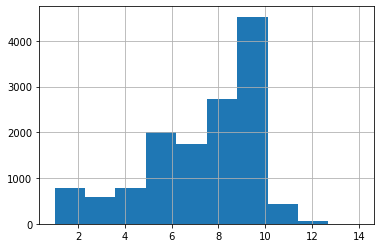

count    13666.000000
mean         7.275867
std          2.440660
min          1.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         14.000000
dtype: float64

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
polb_reviews_len = [len(x) for x in polb_reviews_int]
pd.Series(polb_reviews_len).hist()
plt.show()
pd.Series(polb_reviews_len).describe()

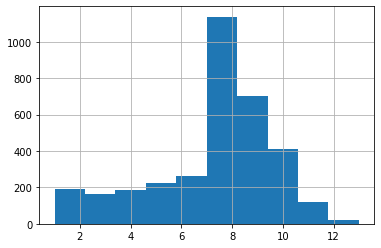

count    3404.000000
mean        7.268214
std         2.445174
min         1.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        13.000000
dtype: float64

In [77]:
%matplotlib inline
polb_test_reviews_len = [len(x) for x in polb_test_reviews_int]
pd.Series(polb_test_reviews_len).hist()
plt.show()
pd.Series(polb_test_reviews_len).describe()

In [0]:
polb_reviews_int = [ polb_reviews_int[i] for i, l in enumerate(polb_reviews_len) if l>0 ]
polb_encoded_labels = [ polb_encoded_labels[i] for i, l in enumerate(polb_reviews_len) if l> 0 ]

In [0]:
polb_test_reviews_int = [ polb_test_reviews_int[i] for i, l in enumerate(polb_test_reviews_len) if l>0 ]
polb_test_encoded_labels = [ polb_test_encoded_labels[i] for i, l in enumerate(polb_test_reviews_len) if l> 0 ]

In [0]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [81]:
polb_features = pad_features(polb_reviews_int, 200)
print (polb_features[:10,:])
print (len(polb_reviews_int))

[[   0    0    0 ...  715   39    7]
 [   0    0    0 ...    6  534 4793]
 [   0    0    0 ... 4794  289 4795]
 ...
 [   0    0    0 ...  535   41 1008]
 [   0    0    0 ... 2516   46 3251]
 [   0    0    0 ... 1706 1009  759]]
13666


In [82]:
polb_test_features = pad_features(polb_test_reviews_int, 200)
print (polb_test_features[:10,:])
print (len(polb_test_reviews_int))

[[   0    0    0 ... 1796   34   47]
 [   0    0    0 ...  177    3 1798]
 [   0    0    0 ...  642 1800  253]
 ...
 [   0    0    0 ...  815   79  542]
 [   0    0    0 ...  469  816 1805]
 [   0    0    0 ...   30  544 1806]]
3404


In [83]:
import torch
from torch.utils.data import DataLoader, TensorDataset
split_frac = 0.8
len_feat = len(polb_reviews_int)
polb_train_x = torch.from_numpy(np.asarray(polb_features[0:int(split_frac*len_feat)]))
print (polb_train_x)
polb_train_y = torch.from_numpy(np.asarray(polb_encoded_labels[0:int(split_frac*len_feat)]))
print (polb_train_y)
print (type(polb_train_y[:1]))
polb_valid_x = torch.from_numpy(np.asarray(polb_features[int(split_frac*len_feat):]))
print (polb_valid_x)
polb_valid_y = torch.from_numpy(np.asarray(polb_encoded_labels[int(split_frac*len_feat):]))
print (polb_valid_y)

tensor([[   0,    0,    0,  ...,  715,   39,    7],
        [   0,    0,    0,  ...,    6,  534, 4793],
        [   0,    0,    0,  ..., 4794,  289, 4795],
        ...,
        [   0,    0,    0,  ...,   25,  148,  271],
        [   0,    0,    0,  ...,   81, 9654,  268],
        [   0,    0,    0,  ..., 9655,    9, 4660]])
tensor([1, 1, 1,  ..., 0, 0, 0])
<class 'torch.Tensor'>
tensor([[    0,     0,     0,  ...,     6,     7,  2317],
        [    0,     0,     0,  ...,  1109,    14,   977],
        [    0,     0,     0,  ...,   110,  9656,    39],
        ...,
        [    0,     0,     0,  ...,   894,  1206, 10827],
        [    0,     0,     0,  ...,  1974,    93,    62],
        [    0,     0,     0,  ...,     7,  4403, 10828]])
tensor([1, 1, 0,  ..., 0, 0, 0])


In [84]:
split_frac1 = 1
len_feat1 = len(polb_test_reviews_int)
polb_test_x = torch.from_numpy(np.asarray(polb_test_features[0:int(split_frac1*len_feat1)]))
print (polb_test_x)
polb_test_y = torch.from_numpy(np.asarray(polb_test_encoded_labels[0:int(split_frac1*len_feat1)]))
print (polb_test_y)

tensor([[   0,    0,    0,  ..., 1796,   34,   47],
        [   0,    0,    0,  ...,  177,    3, 1798],
        [   0,    0,    0,  ...,  642, 1800,  253],
        ...,
        [   0,    0,    0,  ...,   19,  419, 4839],
        [   0,    0,    0,  ...,   31,  774,  489],
        [   0,    0,    0,  ..., 1511,  836,    6]])
tensor([1, 1, 1,  ..., 1, 1, 0])


In [85]:
# create Tensor datasets
polb_train_data = TensorDataset(polb_train_x, polb_train_y)
polb_valid_data = TensorDataset(polb_valid_x, polb_valid_y)
polb_test_data = TensorDataset(polb_test_x, polb_test_y)
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
polb_train_loader = DataLoader(polb_train_data, shuffle=True, batch_size=batch_size, drop_last=True)
print (polb_train_loader)
polb_valid_loader = DataLoader(polb_valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
print (polb_valid_loader)
polb_test_loader = DataLoader(polb_test_data, shuffle=True, batch_size=batch_size, drop_last=True)
print (polb_test_loader)

In [86]:
# obtain one batch of training data
polb_dataiter = iter(polb_train_loader)
sample_x, sample_y = polb_dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[   0,    0,    0,  ...,  292,    9,  233],
        [   0,    0,    0,  ...,    7,   10,    4],
        [   0,    0,    0,  ...,   52,  913,  118],
        ...,
        [   0,    0,    0,  ..., 5109,   72, 3400],
        [   0,    0,    0,  ...,   12,    4,   21],
        [   0,    0,    0,  ..., 1941,  430,  233]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1])


In [87]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [0]:
import torch.nn as nn

class sarcasticLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(sarcasticLSTM, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [89]:
# Instantiate the model w/ hyperparams
vocab_size = len(polb_vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 512
n_layers = 2
net = sarcasticLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

sarcasticLSTM(
  (embedding): Embedding(10829, 400)
  (lstm): LSTM(400, 512, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [0]:
lr=0.005
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [91]:
# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 1
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
  net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in polb_train_loader:
        counter += 1

        if(train_on_gpu):
          inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in polb_valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                  inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 1... Loss: 0.688587... Val Loss: 0.723908
Epoch: 1/4... Step: 2... Loss: 0.758658... Val Loss: 0.986479
Epoch: 1/4... Step: 3... Loss: 0.956309... Val Loss: 0.705939
Epoch: 1/4... Step: 4... Loss: 0.725043... Val Loss: 0.697858
Epoch: 1/4... Step: 5... Loss: 0.704136... Val Loss: 0.696760
Epoch: 1/4... Step: 6... Loss: 0.697763... Val Loss: 0.698452
Epoch: 1/4... Step: 7... Loss: 0.695615... Val Loss: 0.702172
Epoch: 1/4... Step: 8... Loss: 0.725363... Val Loss: 0.700285
Epoch: 1/4... Step: 9... Loss: 0.677684... Val Loss: 0.700282
Epoch: 1/4... Step: 10... Loss: 0.712862... Val Loss: 0.696951
Epoch: 1/4... Step: 11... Loss: 0.693712... Val Loss: 0.694536
Epoch: 1/4... Step: 12... Loss: 0.681178... Val Loss: 0.693380
Epoch: 1/4... Step: 13... Loss: 0.703230... Val Loss: 0.696106
Epoch: 1/4... Step: 14... Loss: 0.706341... Val Loss: 0.696205
Epoch: 1/4... Step: 15... Loss: 0.738222... Val Loss: 0.693430
Epoch: 1/4... Step: 16... Loss: 0.704490... Val Loss: 0.692498
E

In [92]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in polb_test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(polb_test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 1.210
Test accuracy: 0.510
